In [18]:
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_data_raw_city = pd.read_csv(city_data_to_load, encoding="ISO-8859-1")
df_data_raw_ride = pd.read_csv(ride_data_to_load, encoding="ISO-8859-1")
df_data_raw_ride["date"] = pd.to_datetime(df_data_raw_ride["date"])

# Combine the data into a single dataset
#df_merge_pyber_data_left = pd.merge(df_data_raw_ride,df_data_raw_city, on="city", how="left")
df_pyber = pd.merge(df_data_raw_ride,df_data_raw_city, on="city", how="left")

# Display the data table for preview
df_pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

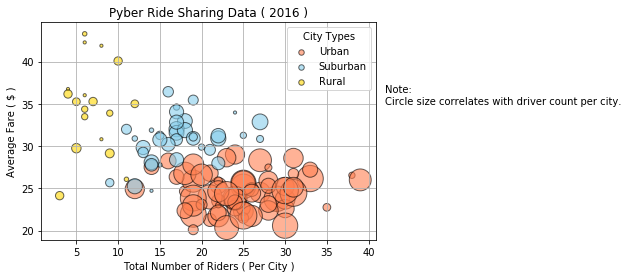

In [30]:
# Obtain the x and y coordinates for each of the three city types

    # For each city type determine x, y, z.
    # x = Total Number of Riders ( Per City ) | Count
    # y = Average Fare ( $ ) | Average
    # z = circle size correlates with driver count per city.| Count
    
# In Legend Order : Urban, Suburban, Rural
dfgb_urb = df_pyber[df_pyber["type"] == "Urban"].groupby([df_pyber["city"]])
s_x_urb = dfgb_urb["ride_id"].count()
s_y_urb = dfgb_urb["fare"].mean()
s_z_urb = dfgb_urb["driver_count"].max() # count() returns invalid corresponding value for driver count.
#s_z_urb

dfgb_sub = df_pyber[df_pyber["type"] == "Suburban"].groupby([df_pyber["city"]])
s_x_sub = dfgb_sub["ride_id"].count()
s_y_sub = dfgb_sub["fare"].mean()
s_z_sub = dfgb_sub["driver_count"].max() # count() returns invalid corresponding value for driver count.
#s_z_sub

dfgb_rur = df_pyber[df_pyber["type"] == "Rural"].groupby([df_pyber["city"]])
s_x_rur = dfgb_rur["ride_id"].count()
s_y_rur = dfgb_rur["fare"].mean()
s_z_rur = dfgb_rur["driver_count"].max() # count() returns invalid corresponding value for driver count.
#s_z_rur


#2019-07-13: have obviously not calculated the driver count properly. Will revisit time permitting.

# Build the scatter plots for each city types
    # Link Reference : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
    # Link Reference : https://pythonspot.com/matplotlib-scatterplot/
    # Syntax: matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, 
    # vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    
    # SOLVED issue with bubble size
    # Link Reference: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
    # Multiply s=area value by an integer.
    
    # COLORS: # Link : https://matplotlib.org/3.1.1/gallery/color/named_colors.html

    
    # In Legend Order : Urban Scatter Plot
plt.scatter(s_x_urb, s_y_urb, s=s_z_urb*10, label="Urban", c=["coral"], marker="o", alpha=0.60, edgecolors="black")
    
    # In Legend Order : Suburban Scatter Plot  
plt.scatter(s_x_sub, s_y_sub, s=s_z_sub*10, label="Suburban", c=["skyblue"], marker="o", alpha=0.60, edgecolors="black")

    # In Legend Order : Rural Scatter Plot    
plt.scatter(s_x_rur, s_y_rur, s=s_z_rur*10, label="Rural", c=["gold"], marker="o", alpha=0.60, edgecolors="black")
   
    
# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data ( 2016 )')
plt.xlabel('Total Number of Riders ( Per City )')
plt.ylabel('Average Fare ( $ )')
plt.grid()
#plt.axis('equal') 

# Create a legend      <<<==== My parents already did.... 
    # Link Reference : https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/legend_demo.html#sphx-glr-gallery-text-labels-and-annotations-legend-demo-py
    # Link Reference : https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html#sphx-glr-gallery-text-labels-and-annotations-custom-legends-py
    # Link Reference : https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
    # Link Reference : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
    # Link Reference : https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend

legend = plt.legend(loc='upper right', title="City Types")

    # Solution from Pablo Jordan Slack #05-Homework thread 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
    
# Incorporate a text label regarding circle size
    # Link Reference : https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/autowrap.html#sphx-glr-gallery-text-labels-and-annotations-autowrap-py
    # https://stackoverflow.com/questions/2660319/putting-newline-in-matplotlib-label-with-tex-in-python

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
    # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
    # added tight to bbox_inches to resolve text getting cut off by none setting
plt.savefig("images/2019PyberBubblePlot.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show plot
plt.show()


## Total Fares by City Type

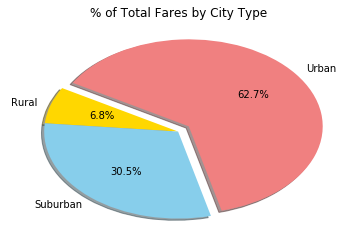

In [34]:
# Calculate Type Percents
    # Link Reference : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
    # syntax taken from this page to start.
    # https://pythonspot.com/matplotlib-pie-chart/
    
    # Create DataFrame : Total Fares by City Type.
df_tfbct = pd.DataFrame(df_pyber.groupby(by="type")["fare"].sum())

# Build Pie Chart


sizes = df_tfbct
explode = (0, 0, 0.1)  

    # COLORS: Link : https://matplotlib.org/3.1.1/gallery/color/named_colors.html
#colors = ["gold","lightskyblue", "coral"] # color combination did not reflect the color scheme diplayed
colors = ["gold","skyblue", "lightcoral"]
labels = "Rural","Suburban", "Urban"

fig1, ax1 = plt.subplots()
ax1.pie(df_tfbct, explode=explode, colors=colors, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("images/2019PyberTotalFareCityType.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show Figure
plt.show()


## Total Rides by City Type

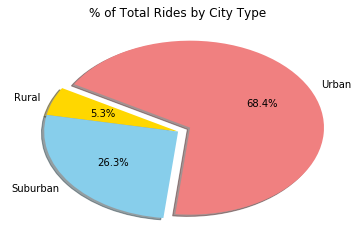

In [35]:
# Calculate Ride Percents
    # Link Reference : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
    # syntax taken from this page to start.
    # https://pythonspot.com/matplotlib-pie-chart/
    
    # Create DataFrame : Total Rides by City Type.
df_trbct = pd.DataFrame(df_pyber.groupby(by="type")["ride_id"].count())

# Build Pie Chart

sizes = df_trbct
explode = (0, 0, 0.1)  

    # COLORS: Link : https://matplotlib.org/3.1.1/gallery/color/named_colors.html
#colors = ["gold","lightskyblue", "coral"] # color combination did not reflect the color scheme diplayed
colors = ["gold","skyblue", "lightcoral"]
labels = "Rural","Suburban", "Urban"

fig1, ax1 = plt.subplots()
ax1.pie(df_trbct, explode=explode, colors=colors, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/2019PyberTotalRidesCityType.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show Figure
plt.show()

## Total Drivers by City Type

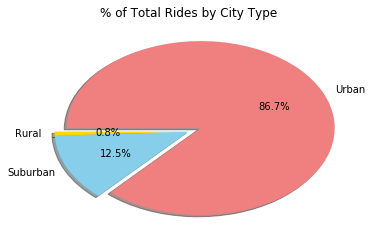

In [36]:
# Calculate Driver Percents
    # Link Reference : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py
    # syntax taken from this page to start.
    # https://pythonspot.com/matplotlib-pie-chart/
    
    # Create DataFrame : Total Drivers by City Type.
df_tdbct = pd.DataFrame(df_pyber.groupby(by="type")["driver_count"].sum())

#2019-07-14: have obviously not calculated the driver count properly.based on resulting graph.
# using count() puts graph off even more. Must need an additional transformation of some sort.

# Build Pie Chart

sizes = df_tdbct
explode = (0, 0, 0.1)  

    # COLORS: Link : https://matplotlib.org/3.1.1/gallery/color/named_colors.html
#colors = ["gold","lightskyblue", "coral"] # color combination did not reflect the color scheme diplayed
colors = ["gold","skyblue", "lightcoral"]
labels = "Rural","Suburban", "Urban"

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=colors, labels=labels,  autopct='%1.1f%%', shadow=True, startangle=180)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("images/2019PyberTotalDriversCityType.jpg", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

# Show Figure
plt.show()

In [23]:
# Show Figure
plt.show()